<a href="https://colab.research.google.com/github/atomkevich/speech_dls/blob/main/Homework_1_Environmental_Sound_Classification_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Классификация звуков</b></h3>

**Автор**: Ермекова Асель


В этом задании вам предстоит решить задачу классификации звуков на основе wav файлов и использовании различных аугментаций данных.

Есть две части этого домашнего задания.

### 1 Часть. Отправить ваши предсказания в Stepik.
Результат вашей лучшей модели будет оцениваться на тестовой выборке по метрике Accuracy. Эта часть оценивается до 5 баллов.

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.70$ --- 4 балла

3) $0.70 > score \geqslant 0.60$ --- 3 балла

4) $0.60 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.25$ --- 1 балл

6) $0.25 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на три части.

1. `train.csv`. На этом наборе данных вам необходимо создать и обучить модель.
2. `valid.csv`. На этом наборе данных вы можете валидировать вашу модель.
3. `test.csv`. Предсказания для этого набора необходимо записать в файл `submission.csv` и сдать в соответствующий шаг на Stepik. Количество попыток ограничено до 100 штук. В конце ноутбука есть пример оформления файла посылки.

### 2 Часть. Сделать полноценный отчет о вашей работе (5 баллов).
Опишите итеративный процесс улучшения метрики:
* как вы обработали данные, какие аугментации добавляли, что сработало, а что нет.
* какие архитектуры модели попробовали и какие результаты получились.

В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается до 5 баллов.

### Peer-review
Вторая часть будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.


### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


# **Environmental Sound Classification**

## **Task Overview**

В этом домашнем задании вам предстоит работать с датасетом различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [8]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=50e1dc75-16ff-49d4-9686-c7ae040bd052
To: /content/sound_classification_dataset.zip
100% 645M/645M [00:04<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /content/train.csv
100% 3.09k/3.09k [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /content/valid.csv
100% 1.06k/1.06k [00:00<00:00, 6.06MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /content/test.csv
100% 719/719 [00:00<00:00, 4.25MB/s]


Разархивируйте zip файл, где содержатся wav файлы датасета.

In [9]:
!unzip /content/sound_classification_dataset.zip

Archive:  /content/sound_classification_dataset.zip
   creating: content/sound_classification_dataset/
  inflating: content/sound_classification_dataset/1-61261-A-44.wav  
  inflating: content/sound_classification_dataset/2-104105-A-19.wav  
  inflating: content/sound_classification_dataset/3-150363-A-38.wav  
  inflating: content/sound_classification_dataset/1-18074-A-6.wav  
  inflating: content/sound_classification_dataset/5-161270-A-33.wav  
  inflating: content/sound_classification_dataset/5-221529-A-39.wav  
  inflating: content/sound_classification_dataset/2-61618-A-46.wav  
  inflating: content/sound_classification_dataset/1-46274-A-18.wav  
  inflating: content/sound_classification_dataset/1-69760-A-16.wav  
  inflating: content/sound_classification_dataset/2-64963-A-15.wav  
  inflating: content/sound_classification_dataset/2-108766-A-9.wav  
  inflating: content/sound_classification_dataset/4-165845-A-45.wav  
  inflating: content/sound_classification_dataset/5-235644-A-30.w

In [31]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
import IPython.display as ipd
warnings.filterwarnings("ignore")

In [11]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [12]:
train_df

,filename,category
0,1-100032-A-0.wav,dog
1,1-110389-A-0.wav,dog
2,1-17367-A-10.wav,rain
3,1-187207-A-20.wav,crying_baby
4,1-211527-A-20.wav,crying_baby
...,...,...
115,3-170383-A-38.wav,clock_tick
116,3-171012-A-38.wav,clock_tick
117,3-171041-A-38.wav,clock_tick
118,3-180256-A-0.wav,dog


Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [13]:
!pip install torch-audiomentations


In [29]:
import os
from typing import Optional, Union
import torch
from torch import Tensor
from torch.utils.data import Dataset
import torchaudio
import torchaudio.transforms as T
from torch_audiomentations import Compose, Gain, PolarityInversion, AddColoredNoise, PitchShift, Shift

class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(
        self,
        df,
        root_dir: Optional[str] = None,
        target_sample_rate: int = 16_000,
        target_duration_sec: Union[int, float] = 2.0,
        do_augmentation: bool = False,
        label2id: Optional[dict] = None,
        return_mono_as_1ch: bool = True,
        dtype: torch.dtype = torch.float32,
        device: Optional[torch.device] = None,
        seed: int = 42,
    ):
        self.df = df.reset_index(drop=True)
        self.root_dir = root_dir
        self.label2id = label2id

        self.target_sr = int(target_sample_rate)
        self.target_num_samples = int(round(self.target_sr * float(target_duration_sec)))
        self.do_augmentation = bool(do_augmentation)
        self.return_mono_as_1ch = bool(return_mono_as_1ch)
        self.dtype = dtype
        self.device = device

        self._resamplers_cache = {}
        torch.manual_seed(seed)

        self._augment = self._augmentation(sample_rate=self.target_sr) if self.do_augmentation else None


    def __len__(self):

        return len(self.df)

    def __getitem__(self, index: int):
        row = self.df.iloc[index]
        path = row["filename"]
        path = os.path.join(self.root_dir, path)

        label = None
        if "category" in row:
            label = row["category"]
            if self.label2id is not None:
                label = int(self.label2id[label])

        # LOAD
        signal, sr = torchaudio.load(path)  # (C, N)

        # PREPROCESS
        signal = self._resample(signal, sr)     # -> target_sr
        signal = self._stereo_to_mono(signal)   # -> (1, N)
        signal = self._cut_or_pad(signal)       # -> (1, target_num_samples)

        # AUGMENT (только для train)
        if self.do_augmentation and self._augment is not None:
            signal = self._augment(samples=signal.unsqueeze(0), sample_rate=self.target_sr).squeeze(0)  # (1, N)

        # приведение типа/устройства
        signal = signal.to(self.dtype)
        if not self.return_mono_as_1ch:
            signal = signal.squeeze(0)  # -> (N,)
        if self.device is not None:
            signal = signal.to(self.device)

        return signal, label

    # --- The Core Preprocessing Functions ---
    def _resample(self, signal: Tensor, original_sr: int) -> Tensor:
        if int(original_sr) == self.target_sr:
            return signal
        if original_sr not in self._resamplers_cache:
            self._resamplers_cache[original_sr] = T.Resample(orig_freq=original_sr, new_freq=self.target_sr)
        return self._resamplers_cache[original_sr](signal)

    def _stereo_to_mono(self, signal: Tensor) -> Tensor:
        if signal.size(0) == 1:
            return signal
        return signal.mean(dim=0, keepdim=True)

    def _cut_or_pad(self, signal: Tensor) -> Tensor:
        n = signal.size(1)
        if n == self.target_num_samples:
            return signal
        if n > self.target_num_samples:
            return signal[:, : self.target_num_samples]
        pad = torch.zeros((1, self.target_num_samples - n), dtype=signal.dtype, device=signal.device)
        return torch.cat([signal, pad], dim=1)

    def _augmentation(self, sample_rate):
        return Compose(
            transforms=[
                AddColoredNoise(min_snr_in_db=10.0, max_snr_in_db=30.0, p=0.5),
                Gain(min_gain_in_db=-6.0, max_gain_in_db=6.0, p=0.5),
                PitchShift(sample_rate=sample_rate, min_transpose_semitones=-2.0, max_transpose_semitones=+2.0, p=0.25),
                Shift(min_shift=-0.2, max_shift=0.2, p=0.5, rollover=True)]
        )


torch.Size([32, 1, 48000])
torch.Size([32])
labels (encoded): [4, 2, 0, 2, 0]
labels (decoded): ['sneezing', 'dog', 'clock_tick', 'dog', 'clock_tick']


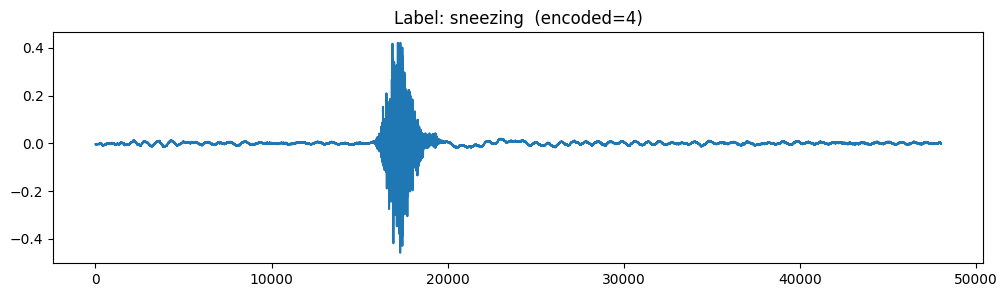

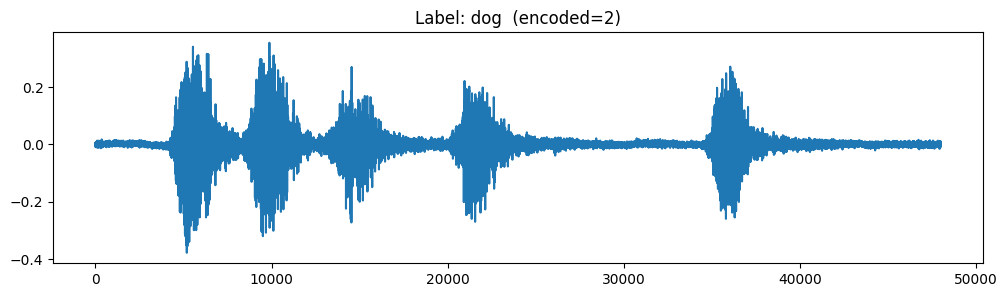

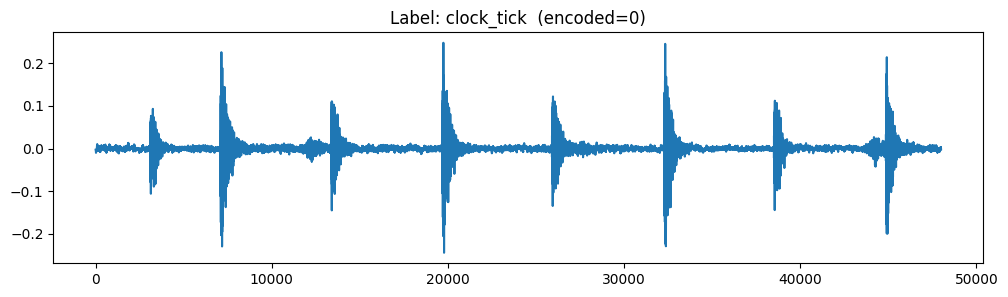

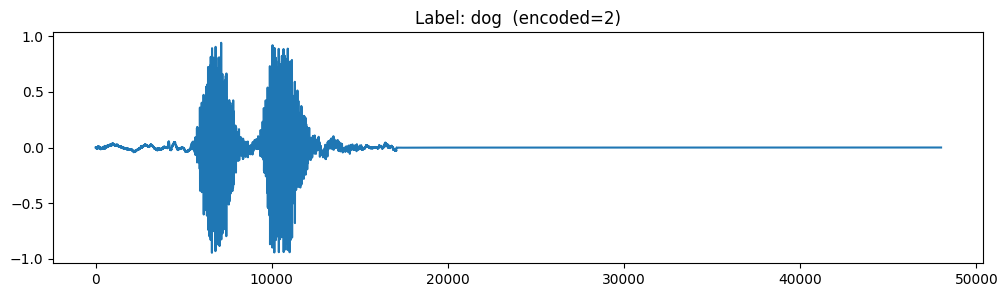

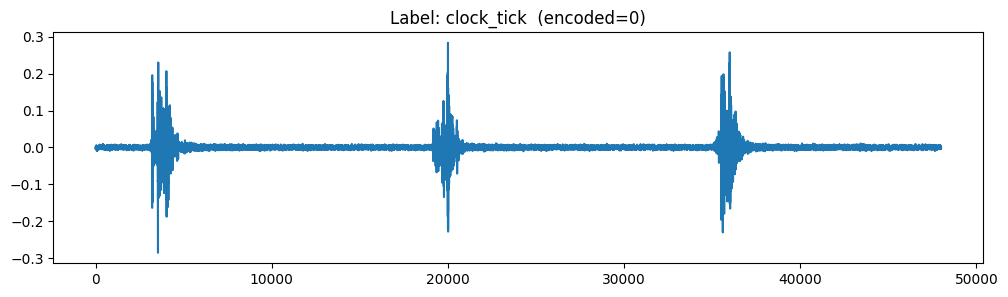

In [35]:

classes = sorted(train_df["category"].unique().tolist())
label2id = {c: i for i, c in enumerate(classes)}

AUDIO_ROOT = "content/sound_classification_dataset"
# 3) датасеты
train_dataset = SimpleAudioDataset(
    train_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=True,
    label2id=label2id
)

valid_dataset = SimpleAudioDataset(
    valid_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=label2id,
)

test_dataset = SimpleAudioDataset(
    test_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False
)


from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

x, y = next(iter(train_loader))
print(x.shape)  # (B, 1, N) по умолчанию
print(y.shape)  # (B,)

debug_num_items = 5
print("labels (encoded):", y[:debug_num_items].tolist())

id2label = {v: k for k, v in label2id.items()}
print("labels (decoded):", [id2label[int(lbl)] for lbl in y[:debug_num_items]])



for i in range(debug_num_items):
  signal = x[i].squeeze(0)  # (N,)
  plt.figure(figsize=(12, 3))
  plt.plot(signal.numpy())
  plt.title(f"Label: {id2label[int(y[i])]}  (encoded={int(y[i])})")
  plt.show()
  # И воспроизведём звук (работает в Jupyter/Colab)
  display(Audio(signal.numpy(), rate=train_dataset.target_sr))


### **Part 2: Building a Model that Learns from Waveforms**

В этом разделе вам нужно написать архитектуру по вашему

*   List item
*   List item

выбору, которая будет решать задачу классификации на 5 классов.

In [36]:
!pip -q install transformers accelerate torchaudio

In [ ]:
import torch, torch.nn as nn
from transformers import AutoConfig, AutoModel, AutoFeatureExtractor

MODEL_NAME = "microsoft/wavlm-base-plus"   # или "facebook/wav2vec2-base"
NUM_CLASSES = 5

config = AutoConfig.from_pretrained(
    MODEL_NAME,
    num_labels=NUM_CLASSES,
    label2id={str(i): i for i in range(NUM_CLASSES)},
    id2label={i: str(i) for i in range(NUM_CLASSES)},
)
feature_extractor = AutoFeatureExtractor.from_pretrained(MODEL_NAME)  # НИ мел-спектров, только нормализация амплитуды

class HFSSLClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_classes=NUM_CLASSES, freeze_backbone=True):
        super().__init__()
        self.backbone = AutoModel.from_pretrained(model_name)
        hidden = self.backbone.config.hidden_size
        self.head = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden, num_classes)
        )
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False

    def forward(self, x, attention_mask=None):
        """
        x: (B, N)
        """
        out = self.backbone(input_values=x, attention_mask=attention_mask)
        # берем CLS-представление / среднее по времени — у wav2vec2 нет CLS → берём mean-pooled last_hidden_state
        h = out.last_hidden_state.mean(dim=1)  # (B, hidden)
        return self.head(h)

model = HFSSLClassifier(freeze_backbone=False).to("cuda" if torch.cuda.is_available() else "cpu")

### **Part 3: Training and Evaluation**

В этом разделе вам нужно написать код тренировки и запустить саму тренировку и вывести лучшие значения метрики качества на train и valid данных. Для вашего удобства написана функция отображения значений лоссов и метрики accuracy.

In [ ]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [ ]:
from torch.utils.data import DataLoader
from IPython.display import clear_output


# Initialize datasets & dataloaders

train_data = SimpleAudioDataset(
    train_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=True,
    label2id=label2id,
    return_mono_as_1ch=True,
)

valid_data = SimpleAudioDataset(
    valid_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=label2id,
    return_mono_as_1ch=True,
)

test_data = SimpleAudioDataset(
    test_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=None,
    return_mono_as_1ch=True,
)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True,  num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_data,  batch_size=16, shuffle=False, num_workers=4, pin_memory=True)


# Model, Loss, Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = HFSSLClassifier(freeze_backbone=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-2)

def normalize_batch(waves_1d: torch.Tensor) -> torch.Tensor:
    # waves_1d: (B, N)
    if getattr(feature_extractor, "do_normalize", False):
        mean = waves_1d.mean(dim=1, keepdim=True)
        std  = waves_1d.std(dim=1, keepdim=True).clamp_min(1e-7)
        waves_1d = (waves_1d - mean) / std
    return waves_1d


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

n_epochs = 10
best_valid_acc = 0.0
best_state = None

for epoch in range(1, n_epochs + 1):
    # -------- Train --------
    model.train()
    running_loss, running_correct, running_total = 0.0, 0, 0

    for signals, labels in train_loader:
        # signals: (B, 1, N) -> (B, N)
        waves = signals.squeeze(1).to(device)
        labels = labels.to(device)

        waves = normalize_batch(waves)

        optimizer.zero_grad()
        logits = model(waves)                  # (B, 5)
        loss = criterion(logits, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        preds = logits.argmax(dim=1)
        running_correct += (preds == labels).sum().item()
        running_total += labels.size(0)

    epoch_train_loss = running_loss / running_total
    epoch_train_acc  = 100.0 * running_correct / running_total

    # -------- Valid --------
    model.eval()
    val_loss_sum, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for signals, labels in valid_loader:
            waves = signals.squeeze(1).to(device)
            labels = labels.to(device)
            waves = normalize_batch(waves)

            logits = model(waves)
            loss = criterion(logits, labels)

            val_loss_sum += loss.item() * labels.size(0)
            val_correct  += (logits.argmax(dim=1) == labels).sum().item()
            val_total    += labels.size(0)

    epoch_valid_loss = val_loss_sum / val_total
    epoch_valid_acc  = 100.0 * val_correct / val_total

    # -------- Лог/графики/лучшее --------
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    clear_output(wait=True)
    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    print(f"Epoch {epoch:02d} | Train loss {epoch_train_loss:.4f} acc {epoch_train_acc:.2f}% "
          f"| Valid loss {epoch_valid_loss:.4f} acc {epoch_valid_acc:.2f}%")

    if epoch_valid_acc > best_valid_acc:
        best_valid_acc = epoch_valid_acc
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

print(f"\nBest Valid Accuracy = {best_valid_acc:.2f}%")
if best_state is not None:
    model.load_state_dict(best_state)
    print("✅ Loaded best model weights (by Valid Accuracy).")


In [ ]:
print("Train Accuracy = ", ...)
print("Valid Accuracy = ", ...)

Train Accuracy =  75.0
Valid Accuracy =  72.5


### **Part 4. Test Demo for ESC-50**

Для вашего удобства предоставляется код для тестирования модели и отрисовки формы сигналов, прогноза и топ-5 наиболее вероятных классов.

Using device: cuda
ESC-50 Audio Classification Demo!


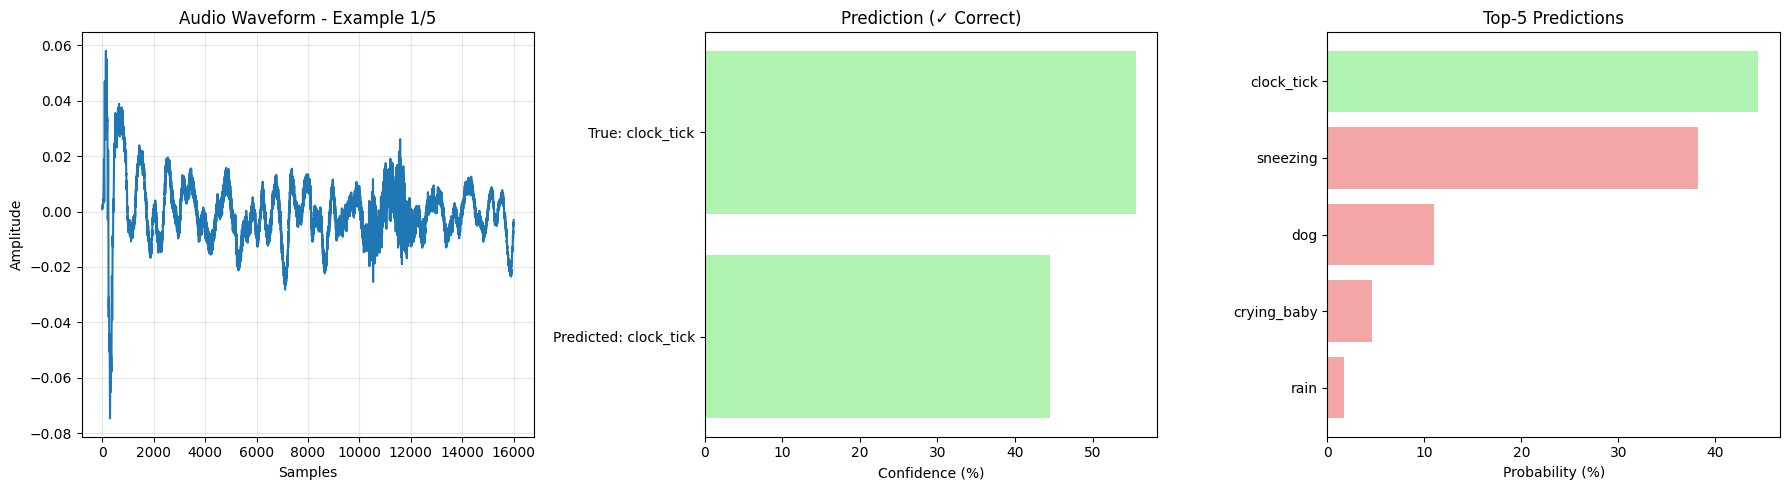

🔊 Playing: clock_tick


📊 Prediction: clock_tick (44.46%)
🎯 True label: clock_tick
✅ Correct: True


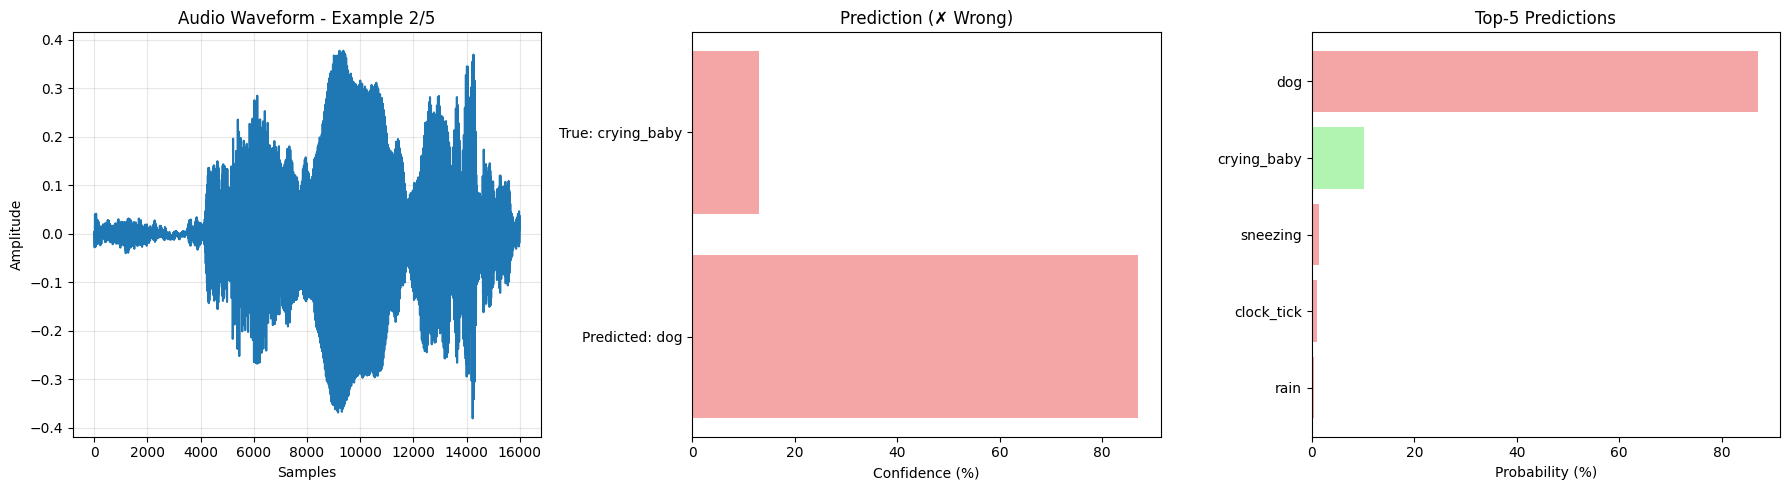

🔊 Playing: crying_baby


📊 Prediction: dog (87.02%)
🎯 True label: crying_baby
✅ Correct: False


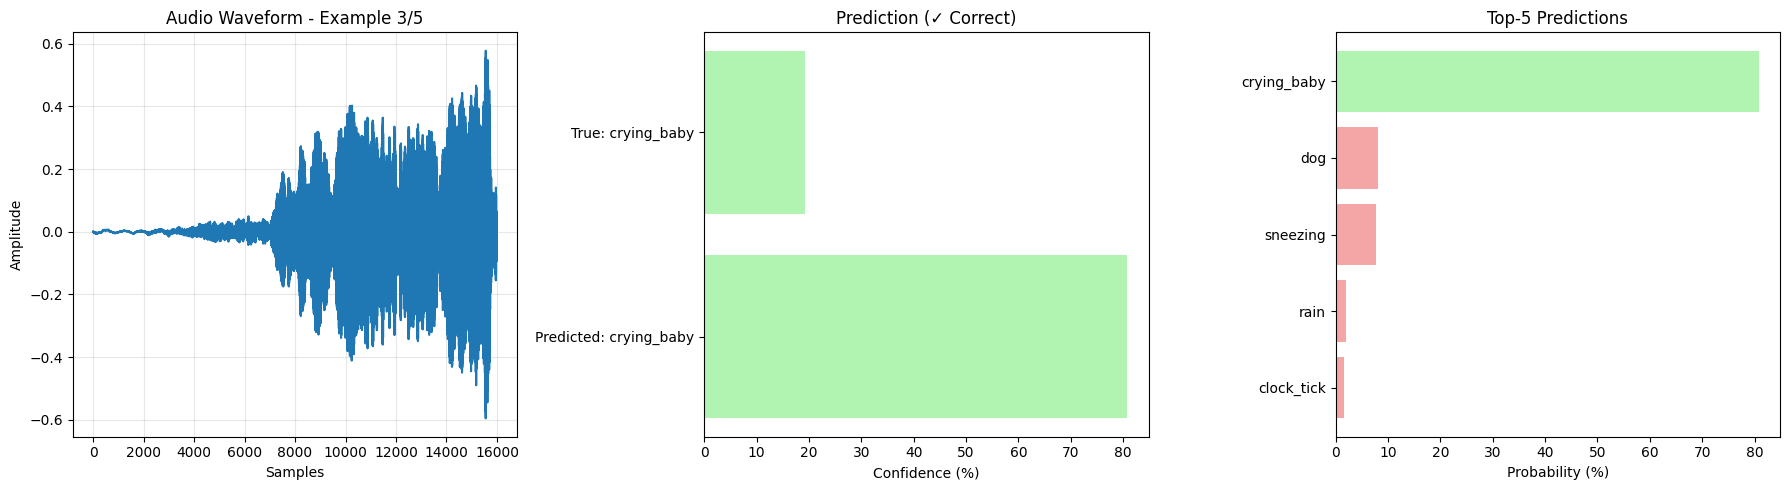

🔊 Playing: crying_baby


📊 Prediction: crying_baby (80.83%)
🎯 True label: crying_baby
✅ Correct: True


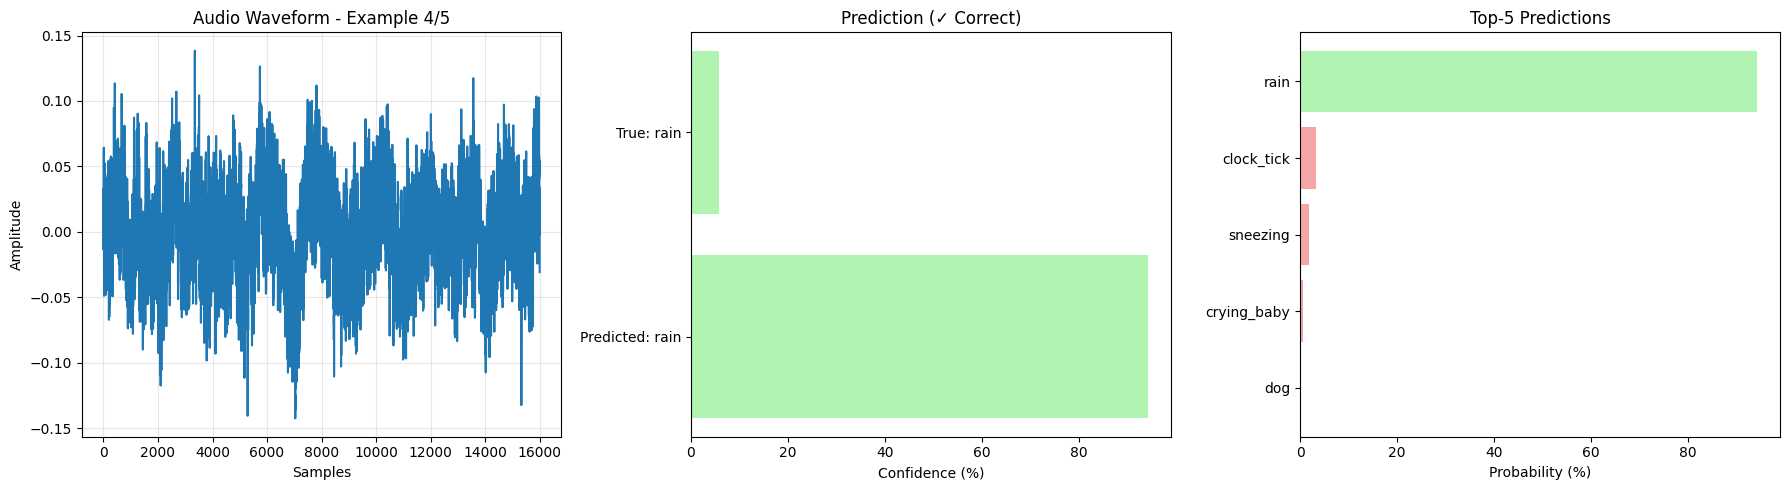

🔊 Playing: rain


📊 Prediction: rain (94.23%)
🎯 True label: rain
✅ Correct: True


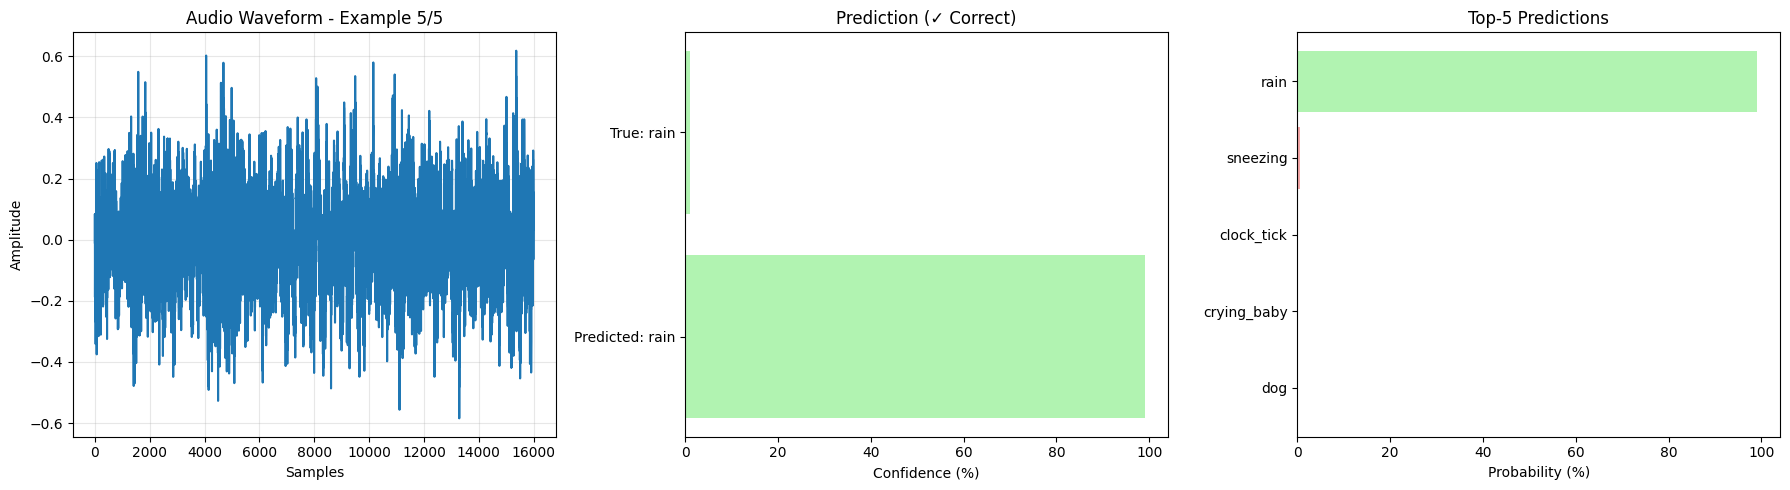

🔊 Playing: rain


📊 Prediction: rain (99.05%)
🎯 True label: rain
✅ Correct: True
📋 ESC-50 Test Set Evaluation (Fold 5):
✅ Correct: 30/40
🎯 Accuracy: 75.00%


In [ ]:
class ESC50TestDemo:
    def __init__(self, model, test_dataset, device):
        self.model = model
        self.test_dataset = test_dataset
        self.device = device
        self.classes = test_dataset.classes
        self.model.eval()  # Set to evaluation mode

    def predict_audio(self, signal):
        """Predict class for a single audio signal"""
        with torch.no_grad():
            signal = signal.unsqueeze(0).to(self.device)  # Add batch dimension
            outputs = self.model(signal)
            probabilities = torch.softmax(outputs, dim=1)
            confidence, predicted = torch.max(probabilities, 1)

        return predicted.item(), confidence.item(), probabilities.cpu().numpy()[0]

    def run_interactive_demo(self, num_examples=1):
        """Run interactive demo with random test examples"""
        print("ESC-50 Audio Classification Demo!")
        print("=" * 60)

        # Get random test examples
        indices = np.random.choice(len(self.test_dataset), num_examples, replace=False)

        for i, idx in enumerate(indices):
            # Load audio and true label
            signal, true_label = self.test_dataset[idx]
            true_class = self.classes[true_label]

            # Get prediction
            predicted_idx, confidence, all_probs = self.predict_audio(signal)
            predicted_class = self.classes[predicted_idx]

            # Clear previous output
            # clear_output(wait=True)

            # Create plot
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

            # Plot waveform
            ax1.plot(signal.squeeze().numpy())
            ax1.set_title(f'Audio Waveform - Example {i+1}/{num_examples}')
            ax1.set_xlabel('Samples')
            ax1.set_ylabel('Amplitude')
            ax1.grid(True, alpha=0.3)

            # Plot prediction info
            colors = ['lightcoral', 'lightgreen']
            correct = predicted_class == true_class
            ax2.barh([0, 1], [confidence * 100, (1-confidence) * 100],
                     color=colors[correct], alpha=0.7)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels([f'Predicted: {predicted_class}',
                               f'True: {true_class}'])
            ax2.set_xlabel('Confidence (%)')
            ax2.set_title(f'Prediction ({"✓ Correct" if correct else "✗ Wrong"})')

            # Plot top-5 predictions
            top5_indices = np.argsort(all_probs)[-5:][::-1]
            top5_classes = [self.classes[idx] for idx in top5_indices]
            top5_probs = all_probs[top5_indices]

            colors = ['lightgreen' if cls == true_class else 'lightcoral' for cls in top5_classes]
            ax3.barh(range(5), top5_probs * 100, color=colors, alpha=0.7)
            ax3.set_yticks(range(5))
            ax3.set_yticklabels(top5_classes)
            ax3.set_xlabel('Probability (%)')
            ax3.set_title('Top-5 Predictions')
            ax3.invert_yaxis()  # Highest probability at top

            plt.tight_layout()
            plt.show()

            # Display audio player
            print(f"Playing: {true_class}")
            display(Audio(signal.squeeze().numpy(), rate=16000))

            print(f"Prediction: {predicted_class} ({confidence:.2%})")
            print(f"True label: {true_class}")
            print(f"Correct: {correct}")
            print("=" * 60)


    def evaluate_test_set(self):
        """Evaluate on entire test set"""
        test_loader = DataLoader(self.test_dataset, batch_size=32, shuffle=False)
        self.model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs.data, 1)

                total += target.size(0)
                correct += (predicted == target).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(target.cpu().numpy())

        accuracy = 100 * correct / total
        print(f"ESC-50 Test Set Evaluation (Fold 5):")
        print(f"Correct: {correct}/{total}")
        print(f"Accuracy: {accuracy:.2f}%")

        return accuracy, all_predictions, all_labels

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create demo
demo = ESC50TestDemo(model, valid_dataset, device)

# Run interactive demo
demo.run_interactive_demo(num_examples=5)

# Evaluate on entire test set
test_accuracy, predictions, true_labels = demo.evaluate_test_set()

### **Create submission to Stepik**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [ ]:
y_test_pred = # here are your predictions

In [ ]:
submission = pd.read_csv("/content/test.csv")
submission['category'] = y_test_pred
submission.to_csv("/content/submission.csv", index=False)

### **Report**

Опишите ваш путь экспериментов и что вы сделали, чтобы получить наилучшую модель.